In [2]:
import pandas as pd
import numpy as np
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.externals import joblib
import spacy
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 3
import seaborn as sns

In [45]:
#load ingredient db for allrecipes 
db = pd.read_csv('allrecipes_ingreds_db_all.csv')
db = db.drop(columns=['Unnamed: 0'])
db = db.set_index('recipename')
print(len(np.unique(db.index)))
db.head()

4788


,ingredients
recipename,
a good easy garlic chicken,3 tablespoons butter
a good easy garlic chicken,"4 skinless, boneless chicken breast halves"
a good easy garlic chicken,2 teaspoons garlic powder
a good easy garlic chicken,1 teaspoon seasoning salt
a good easy garlic chicken,1 teaspoon onion powder


In [20]:
#remove numbers from ingredients
db['ingredients'] = db['ingredients'].apply(lambda x: re.sub('[^A-Za-z\s]','',x).strip()) 
db.head()

,ingredients
recipename,
a good easy garlic chicken,tablespoons butter
a good easy garlic chicken,skinless boneless chicken breast halves
a good easy garlic chicken,teaspoons garlic powder
a good easy garlic chicken,teaspoon seasoning salt
a good easy garlic chicken,teaspoon onion powder


In [21]:
#remove common measurement words
measurements = ['spoon','pound','cup','quart','ounce','pint','degree','dash','pinch','pack','halve','bunch']
for term in measurements:
    expr = '\w*'+term+'\w*'
    db['ingredients'] = db['ingredients'].apply(lambda x: re.sub(expr,'',x).strip())
db.head()

,ingredients
recipename,
a good easy garlic chicken,butter
a good easy garlic chicken,skinless boneless chicken breast
a good easy garlic chicken,garlic powder
a good easy garlic chicken,seasoning salt
a good easy garlic chicken,onion powder


In [22]:
stopwords = ['chopped','cut','divided','minced','seeded','chunks','finely','diced','beaten','peeled','cooked','shredded',
            'taste','melted','small','grated','slices','large','medium','thinly','sliced','slice','plain','skinless','boneless',
            'mild','light','can','rinsed','drained','removed','distilled','quick','cooking','bottle','chunky','crushed',
            'thawed','allpurpose','juiced','dried','dry','crumble','crumbled','uncooked','optional','coarsely','coarse',
            'thick','inch','jar','lowsodium','sodium','high','low','flatcut','seeded','lean','clove','cloves','cubed',
            'envelope','head','longgrain','prepare','prepared','frozen','skinon','bonein','kosher','pieces','piece','sprig',
            'sprigs','beaten','very','bulk','half','halves','drain','needed','frying','fried','prebaked','container',
            'processed','substitute','reducedfat','reduce','reduced','extravirgin','sticks','stick','squares','square','wedge',
            'wedges','ingredients','ingredient','fatfree','lengthwise','length','heavy','instant','deveined','strip','strips',
            'clarified','stalks','stalk','skim','partskim','pitted','julienned','portion','portions','standing','washed','whole',
            'topping','gallon','jars','bottles','refrigerated','refrigerate','spray','cooking','box','boxes','thawed','fresh',
            'rubbed','dissolved','dissolve','aged','zest','zested','dredging','thin','extra','inchthick','lightly','bitesize',
            'top','tops','floret','florets','freshly','fluid','split','creamy','slightly','cored','core','cores','mix','mashed',
            'reserved','reserves','soft','softened','wide','flaked','unsalted','salted','canned','soaked','to','and','in',
            'mixed','fl','oz','raw','for','into','of','liquid','from','sharp','such','as','more','or','eg','serving','blend',
            'blended','smoked','containers','preferably','pure','dusting','with','no','msg','bite','size','thickness','separate',
            'separated','stewed','unbaked','freshground','rapidrise','envelop','envelopes','toppings','fully','full','simmered',
            'see','note','up','your','favorite','toasted','mini','wooden','drops','the','a','an','hard']

In [23]:
db['ingredients'] = db['ingredients'].apply(lambda x: ' '.join([i.lower() for i in x.split(' ') if i.lower() not in stopwords]))

In [196]:
db.tail(100)

,ingredients
recipename,
wedge salad with elegant blue cheese dressing,red wine vinegar
wedge salad with elegant blue cheese dressing,olive oil
wedge salad with elegant blue cheese dressing,white sugar
wedge salad with elegant blue cheese dressing,garlic
wedge salad with elegant blue cheese dressing,ground black pepper
wedge salad with elegant blue cheese dressing,iceberg lettuce
wedge salad with elegant blue cheese dressing,roma tomatoes
wedge salad with elegant blue cheese dressing,red onion
wedge salad with elegant blue cheese dressing,blue cheese


In [24]:
#stem the ingredients
stemmer = SnowballStemmer("english")
db['ingredients'] = db['ingredients'].apply(lambda x: ' '.join([stemmer.stem(i) for i in x.split(' ')]))

In [25]:
#prep ingredient list into recipe documents for training word2vec
recipetext = []
recipenames = []
for name in np.unique(db.index):
    recipetext.append((' '.join([x for x in db.loc[name].ingredients])).split())
    recipenames.append(name)
recipetext

[['batter',
  'mazola',
  'flour',
  'fleischmann',
  'yeast',
  'sugar',
  'salt',
  'warm',
  'water',
  'f',
  'f',
  'oliv',
  'oil',
  'bread',
  'chicken',
  'breast',
  'tender',
  'spaghetti',
  'sauc',
  'italian',
  'chees',
  'spice',
  'island',
  'italian',
  'herb',
  'season'],
 ['batter',
  'mazola',
  'flour',
  'fleischmann',
  'yeast',
  'sugar',
  'salt',
  'warm',
  'water',
  'f',
  'f',
  'oliv',
  'oil',
  'pizza',
  'sauc',
  'pepperoni',
  'mozzarella',
  'chees'],
 ['petit',
  'pea',
  'smokeflavor',
  'almond',
  'onion',
  'mayonnais',
  'ground',
  'black',
  'pepper'],
 ['veget',
  'oil',
  'chicken',
  'breast',
  'campbel',
  'condens',
  'cream',
  'chicken',
  'herb',
  'soup',
  'milk',
  'broth',
  'rice'],
 ['veget',
  'oil',
  'chicken',
  'breast',
  'bag',
  'pasta',
  'veget',
  'campbel',
  'cream',
  'soup',
  'water'],
 ['butter',
  'margarin',
  'chicken',
  'breast',
  'broccoli',
  'floweret',
  'campbel',
  'condens',
  'cream',
  'chick

In [199]:
#train word2vec model on recipe ingred docs
maxwords = np.array([len(x) for x in recipetext]).max()
model = gensim.models.Word2Vec(recipetext,size=maxwords,min_count=2,window=maxwords)
model.train(recipetext,total_examples=len(recipetext),epochs=10)

(475730, 855250)

In [200]:
w1 = 'fillet'
model.wv.most_similar(positive=w1)

[('tilapia', 0.9417146444320679),
 ('salmon', 0.8845885396003723),
 ('halibut', 0.8776792883872986),
 ('cod', 0.8611513376235962),
 ('snapper', 0.8452963829040527),
 ('mahi', 0.8314896821975708),
 ('catfish', 0.824044406414032),
 ('per', 0.8202084898948669),
 ('shark', 0.8154594302177429),
 ('lemon', 0.8150396347045898)]

In [201]:
print(model.vector_size)
print(len(model.wv.vocab))

56
1203


In [202]:
model.wv.save_word2vec_format('recipe_ingred_word2vec.bin.gz',binary=False)

In [203]:
#use spacy init-model to convert word2vec file for spacy
nlp = spacy.load('recipe_ingred_word2vec_lg/')

In [204]:
recipetext_db = pd.DataFrame([' '.join(x) for x in recipetext],index=recipenames,columns=['ingredients'])
recipe1 = 'a good easy garlic chicken'
recipe2 = 'a jerky chicken'
recipe3 = 'asian beef skewers'
doc1 = nlp(recipetext_db.loc[recipe1].ingredients)
doc2 = nlp(recipetext_db.loc[recipe2].ingredients)
doc3 = nlp(recipetext_db.loc[recipe3].ingredients)
similarity = []
for num in range(0,len(recipetext_db)):
        similarity.append(doc1.similarity(nlp(recipetext_db.iloc[num].ingredients)))
similarity = np.array(similarity)
indices = (-similarity).argsort()[:10]
print(recipetext_db.iloc[indices].ingredients)

a good easy garlic chicken        butter chicken breast garlic powder season sal...
paprika chicken with mushrooms    chicken breast paprika salt pepper garlic powd...
grilled whole turkey              turkey water chicken bouillon powder garlic po...
chicken piccata ii                chicken breast egg lemon juic flour garlic pow...
better than best fried chicken    chicken breast condens cream chicken soup egg ...
ginas lemon pepper chicken        chicken breast lemon pepper garlic powder onio...
cinnamon chicken                  chicken breast ground cinnamon italianstyl sea...
turkey thighs in brown sauce      turkey thigh salt pepper flour poultri season ...
creamy chipotle chicken           chicken breast butter salt ground black pepper...
easy crispy baked chicken         saltin cracker season salt garlic powder chick...
Name: ingredients, dtype: object


/home/jcheung2009/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


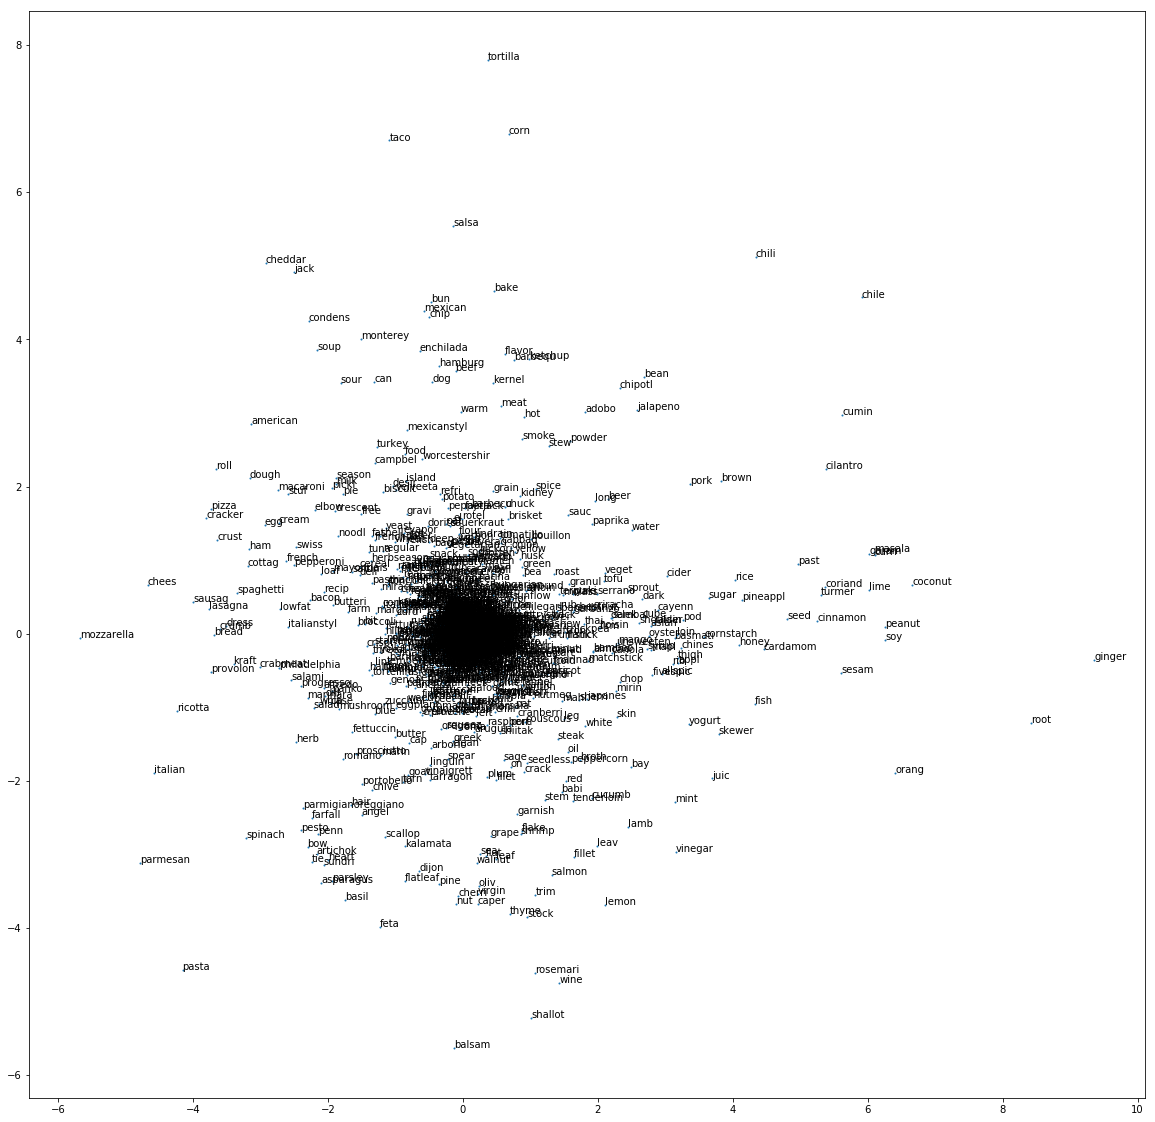

In [206]:
wordvecs = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(wordvecs)
plt.figure(figsize=(20,20))
plt.scatter(result[:,0],result[:,1],s=1)

words = list(model.wv.vocab)
for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))


In [208]:
recipetext_db.to_csv('ingreds_db_cleaned.csv')
recipetext_db.head()

,ingredients
1 dish chicken parmesan,batter mazola flour fleischmann yeast sugar sa...
1 dish pepperoni cheese pizza bake,batter mazola flour fleischmann yeast sugar sa...
1 pea salad most requested,petit pea smokeflavor almond onion mayonnais g...
15 minute herbed chicken,veget oil chicken breast campbel condens cream...
2 step creamy chicken and pasta,veget oil chicken breast bag pasta veget campb...


In [7]:
recipe1 = 'white and gold pizza'
db = pd.read_csv('allrecipes_ingreds_db_all.csv')
db = db.drop(columns=['Unnamed: 0'])
db = db.set_index('recipename')

doc1 = nlp(recipetext_db.loc[recipe1].ingredients)
similarity = []
for num in range(0,len(recipetext_db)):
        similarity.append(doc1.similarity(nlp(recipetext_db.iloc[num].ingredients)))
similarity = np.array(similarity)
indices = (-similarity).argsort()[:10]
similarrecipes = recipetext_db.iloc[indices].index

print(db.loc[similarrecipes[:10]])

                                                                                                 ingredients
recipename                                                                                                  
white and gold pizza         3 tablespoons olive oil, divided                                               
white and gold pizza         1 large sweet onion, thinly sliced, separated into rings                       
white and gold pizza         1 pound frozen pizza dough, thawed                                             
white and gold pizza         1 large clove garlic, minced                                                   
white and gold pizza         4 ounces PHILADELPHIA Cream Cheese, softened                                   
white and gold pizza         3/4 cup KRAFT Shredded Mozzarella Cheese                                       
white and gold pizza         1/2 cup DIGIORNO Grated Romano Cheese                                          
white and gold pizz

In [3]:
#word vector model used to filter recipes by ingredient similarity
nlp = spacy.load('recipe_nutrition_app/app_data/recipe_ingred_word2vec_lg/')
recipetext_db = pd.read_csv('recipe_nutrition_app/app_data/ingreds_db_cleaned.csv').set_index('Unnamed: 0')
recipetext_db.head()

,ingredients
Unnamed: 0,
1 dish chicken parmesan,batter mazola flour fleischmann yeast sugar sa...
1 dish pepperoni cheese pizza bake,batter mazola flour fleischmann yeast sugar sa...
1 pea salad most requested,petit pea smokeflavor almond onion mayonnais g...
15 minute herbed chicken,veget oil chicken breast campbel condens cream...
2 step creamy chicken and pasta,veget oil chicken breast bag pasta veget campb...


In [6]:
#NLP validation: manual label on scale from 1 to 5, 5 being most similar in ingredients/functional similarity
pd.set_option('display.max_colwidth', -1)
recipenames = np.unique(db.index)
filter_on = []
score = []
numiter = 1
for num in range(0,numiter):
#     firstrecipe = recipenames[np.random.choice(np.arange(0,len(recipenames)),size=1)][0]
    firstrecipe = 'pepperoni penne'
    applyfilt = np.random.choice([0,0],size=1)[0]
    filter_on.append(applyfilt)
    if applyfilt == 1:
        doc1 = nlp(recipetext_db.loc[firstrecipe].ingredients)
        similarity = []
        for idx in range(0,len(recipetext_db)):
            similarity.append(doc1.similarity(nlp(recipetext_db.iloc[idx].ingredients)))
        similarity = np.array(similarity)
        index = (-similarity).argsort()[1]
        secondrecipe = recipetext_db.iloc[index].name
        print(db.loc[[firstrecipe,secondrecipe]])
        score.append(int(input("similarity (1-5):")))
    else:
        secondrecipe = recipenames[np.random.choice(np.arange(0,len(recipenames)),size=1)][0]
        while secondrecipe == firstrecipe:
            secondrecipe = recipenames[np.random.choice(np.arange(0,len(recipenames)),size=1)][0]
        print(db.loc[[firstrecipe,secondrecipe]])
        score.append(int(input("similarity (1-5):")))
    clear_output()


In [317]:
print(filter_on)
print(score)

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
[5, 4, 3, 2, 1, 5, 1, 1, 3, 4, 1, 4, 4, 3, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 3, 3, 1, 2, 1, 4, 1, 3, 5, 5, 1, 1, 1, 1, 4, 2, 3, 1, 1, 4, 1, 4, 1, 5, 1, 1, 5, 1, 1, 1, 3, 3, 1, 1, 3, 4, 1, 1, 1, 5, 1, 1, 1, 5, 5, 2, 3, 1, 4, 1, 5, 5, 1, 1, 1, 1, 1, 4, 2, 5, 1, 2, 1, 5, 3, 3, 1, 5, 1, 5, 1, 1, 5, 4, 4, 1]


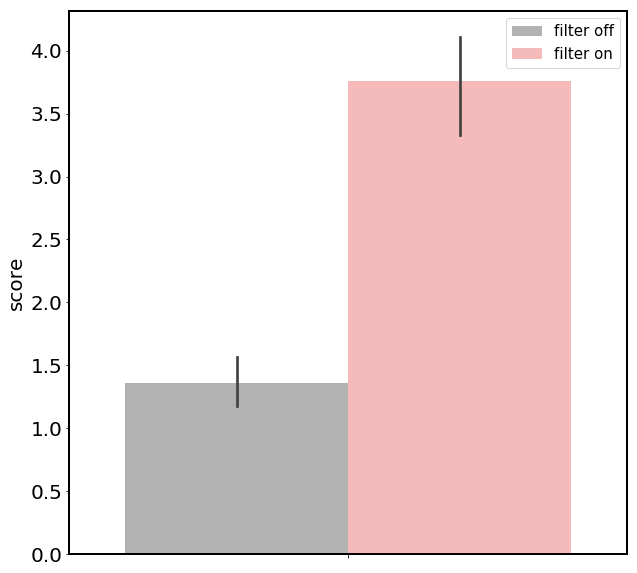

In [351]:
nlpvalidation = pd.DataFrame({'filter':filter_on,'scores':score})
plt.figure(figsize=(10,10))
ax=plt.gca()
g = sns.barplot(x="variable",y="value",hue="filter",data = nlpvalidation.melt(id_vars='filter'),palette=['k','r'],alpha=0.3)
ax.tick_params(labelsize=20)
plt.ylabel('score',fontsize=20)
plt.xlabel('')
ax.set_xticklabels('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['filter off','filter on'],fontsize=15)
plt.savefig('nlpvalidation.png',dpi=300)
nlpvalidation.to_csv('nlpvalidation.csv')

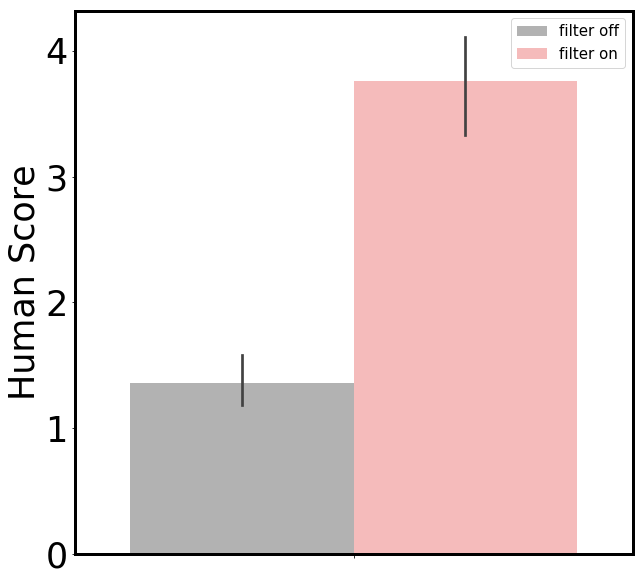

In [46]:
nlpvalidation = pd.read_csv('nlpvalidation.csv').drop(columns='Unnamed: 0')

plt.figure(figsize=(10,10))
ax=plt.gca()
g = sns.barplot(x="variable",y="value",hue="filter",data = nlpvalidation.melt(id_vars='filter'),palette=['k','r'],alpha=0.3)
ax.tick_params(labelsize=35)
plt.ylabel('Human Score',fontsize=35)
plt.xlabel('')
ax.set_xticklabels('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['filter off','filter on'],fontsize=15)
plt.savefig('nlpvalidation.png',dpi=300,bbox_inches="tight")